# Logistic Regression using L2 Regularization and SGD

importing libraries

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler

### 1.1 Data Preprocessing 

1.1.1 Loding breast cancer dataset from sklearn data library

In [36]:
from sklearn.datasets import load_breast_cancer
lbc=load_breast_cancer()
X=lbc.data
y=lbc.target

1.1.2 Split data set into train set and test set

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

1.1.3 Normalize dataset

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

1.1.4 Applying PCA(Principle component analysis (dimensionality reduction)) on dataset

### 1.2 Logistic Regression

1.2.1 Sigmoid Function

In [57]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

1.2.2 Predict function

In [58]:
def predict(X_test, weights,b):
    z = np.dot(X_test,weights)+b        
    probs = np.array([sigmoid(i) for i in z])
    predictions = np.where(probs >= 0.5, 1, 0)
    return predictions,probs

1.2.3 Loss function

In [59]:
def logLoss(y,yhat):
    return -(y*np.log(yhat)+(1-y)*np.log(1-yhat))

1.2.4 Logictic Regression function

In [60]:
def lr(x, y, x_test, l_rate, epoch):
    weights_l2 = np.zeros(np.shape(x)[1])
    weight_old = np.zeros(np.shape(x)[1])
    loss=np.zeros(epoch)
    b=0
    m=y.shape[0]
    epoch_arr=np.array(range(epoch))
    costs=[]
    for i in range(epoch):
        log_loss=0
        for j, row in enumerate(x):
            z=np.dot(weights_l2.T,row)+b
            yhat=sigmoid(z)
            error = y[j] - yhat
            weights_l2=np.dot((1-(l_rate)),weights_l2.T)+l_rate*row*error
            
            log_loss+=logLoss(y[j],yhat)
        weight_old=weights_l2
            
        loss[i]=log_loss/m
        
                
    y_pred_train,train_probs=predict(x,weights_l2,b)
    y_pred_test,test_probs=predict(x_test,weights_l2,b)
    print("LR with L2 weight")
    print(weights_l2)
    print("loss during training per epoch")
    print(loss)
    
    return weights_l2, loss,y_pred_train, y_pred_test,test_probs

### 1.3 calling Logistc function with dataset learning rate epoch

1.3.1 calling lr function

In [61]:
l_rate=0.01
n_epoch=10
weight, train_loss1,y_pred_train,y_pred_test,test_probs = lr(X_train, y_train, X_test, l_rate, n_epoch)
print("train Loss array")


LR with L2 weight
[-0.10880456 -0.08021115 -0.11034444 -0.10303038 -0.06361126 -0.09897151
 -0.10105393 -0.12119761 -0.06020043  0.00101726 -0.08775955 -0.00971804
 -0.08599825 -0.07715011  0.01481689 -0.03732683 -0.01162014 -0.04874706
  0.0075307   0.00424214 -0.1221484  -0.09476032 -0.12203463 -0.11133548
 -0.08303719 -0.10841267 -0.11087059 -0.13253162 -0.09454218 -0.07105324]
loss during training per epoch
[0.33389602 0.30546655 0.3054601  0.3054601  0.3054601  0.3054601
 0.3054601  0.3054601  0.3054601  0.3054601 ]
train Loss array


1.3.2 calculating cunfusion mtrix and accuracy score

In [62]:
print("LR with L2 confusion matrix")
print(confusion_matrix(y_train,y_pred_train))
print("LR with L2 accuracy score")
print(accuracy_score(y_train,y_pred_train))

LR with L2 confusion matrix
[[140   9]
 [ 14 235]]
LR with L2 accuracy score
0.9422110552763819


In [63]:
m1=y_test.shape[0]
log_loss_test=0
for i in range(m1):
    a=logLoss(y_test[i],test_probs[i])
    log_loss_test+=a

print("log loss of test")
print(log_loss_test/m1)

log loss of test
0.3321128749519511


In [64]:
print("LR with L2 confusion matrix")
print(confusion_matrix(y_test,y_pred_test))
print("LR with L2 accuracy score")
print(accuracy_score(y_test,y_pred_test))

LR with L2 confusion matrix
[[ 58   5]
 [  7 101]]
LR with L2 accuracy score
0.9298245614035088


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
clf = LogisticRegression(penalty = 'l2', C = 0.01)
clf.fit(X_train_pca, y_train)
y_pred=clf.predict(X_test_pca)

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
print("LR with L2 confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("LR with L2 accuracy score")
print(accuracy_score(y_test,y_pred))

LR with L2 confusion matrix
[[ 57   6]
 [  3 105]]
LR with L2 accuracy score
0.9473684210526315


Visualizing epoch vs train loss

In [67]:
import matplotlib.pyplot as plt

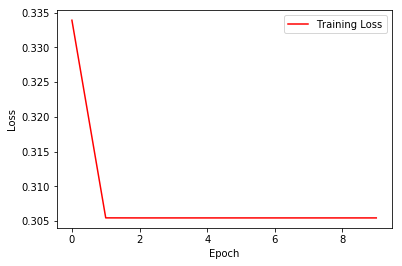

In [68]:
plt.plot(epoch_arr, train_loss1, 'r-')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();